In [1]:
import pandas as pd 
import numpy as np
import math
from numpy.linalg import linalg
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns

In [2]:
train = pd.read_csv('data/train_NYTaxi.csv').drop(columns = ['Index'])

In [3]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [5]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.333564,-72.448815,39.887315,-72.479259,39.890066,1.682150
std,9.810826,10.869743,6.383817,12.774264,6.260724,1.308617
min,-9.300000,-736.516667,-74.015935,-2319.633333,-74.011085,0.000000
25%,6.000000,-73.992133,40.734793,-73.991443,40.734034,1.000000
50%,8.500000,-73.981850,40.752464,-73.980214,40.753093,1.000000
75%,12.500000,-73.967172,40.767032,-73.963718,40.768042,2.000000
max,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


As we can see above that some of the fare is below zero and some of the passenger count is also zero. These all values should not exist and so rows with such enrtries should be dropped. 

Similarly, the longitude should be between -180 and +180 while the lattitude should be between -90 and +90.

So we will have to drop all rows with the above voilations.

In [8]:
from collections import Counter

In [9]:
Counter(train['fare_amount'] <= 0)  # since fare is never zero for a certain distance

Counter({False: 99994, True: 6})

In [10]:
train.drop(train[train['fare_amount'] <= 0].index, inplace = True, axis = 0)

In [11]:
train.shape

(99994, 8)

In [12]:
Counter(train['pickup_latitude'] > 90)

Counter({False: 99993, True: 1})

In [13]:
Counter(train['dropoff_latitude'] > 90)

Counter({False: 99994})

In [14]:
Counter(train['pickup_latitude'] < -90)

Counter({False: 99994})

In [15]:
Counter(train['dropoff_latitude'] < -90)

Counter({False: 99994})

In [16]:
Counter(train['pickup_longitude'] > 180)

Counter({False: 99994})

In [17]:
Counter(train['pickup_longitude'] < -180)

Counter({False: 99993, True: 1})

In [18]:
Counter(train['dropoff_longitude'] < -180)

Counter({False: 99993, True: 1})

In [19]:
Counter(train['dropoff_longitude'] > 180)

Counter({False: 99994})

In [20]:
train.drop(train[train['dropoff_longitude'] < -180].index, inplace = True, axis = 0)
train.drop(train[train['pickup_longitude'] < -180].index, inplace = True, axis = 0)
train.drop(train[train['pickup_latitude'] > 90].index, inplace = True, axis = 0)

In [21]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000,99991.000000
mean,11.334412,-72.442053,39.883597,-72.456668,39.890394,1.682121
std,9.810524,10.665431,6.279008,10.615732,6.259731,1.308581
min,0.010000,-121.391202,-74.015935,-121.391318,-74.011085,0.000000
25%,6.000000,-73.992133,40.734791,-73.991443,40.734034,1.000000
50%,8.500000,-73.981850,40.752462,-73.980215,40.753087,1.000000
75%,12.500000,-73.967173,40.767032,-73.963723,40.768042,2.000000
max,394.000000,40.801777,42.603366,40.787037,44.640672,6.000000


In [22]:
Counter(train['passenger_count'] == 0)

Counter({False: 99622, True: 369})

In [23]:
train.drop(train[train['passenger_count'] == 0].index, inplace = True, axis = 0)

In [24]:
train.shape

(99622, 8)

In [25]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99622.000000,99622.000000,99622.000000,99622.000000,99622.000000,99622.000000
mean,11.342516,-72.440074,39.882427,-72.455499,39.889650,1.688352
std,9.821215,10.672429,6.284058,10.620103,6.263451,1.306984
min,0.010000,-121.391202,-74.015935,-121.391318,-74.011085,1.000000
25%,6.000000,-73.992133,40.734777,-73.991443,40.734021,1.000000
50%,8.500000,-73.981851,40.752457,-73.980215,40.753081,1.000000
75%,12.500000,-73.967171,40.767024,-73.963724,40.768036,2.000000
max,394.000000,40.801777,42.603366,40.787037,44.640672,6.000000


In [26]:
Counter(train['passenger_count'])

Counter({2: 14716, 1: 69310, 5: 7063, 6: 2136, 3: 4264, 4: 2133})

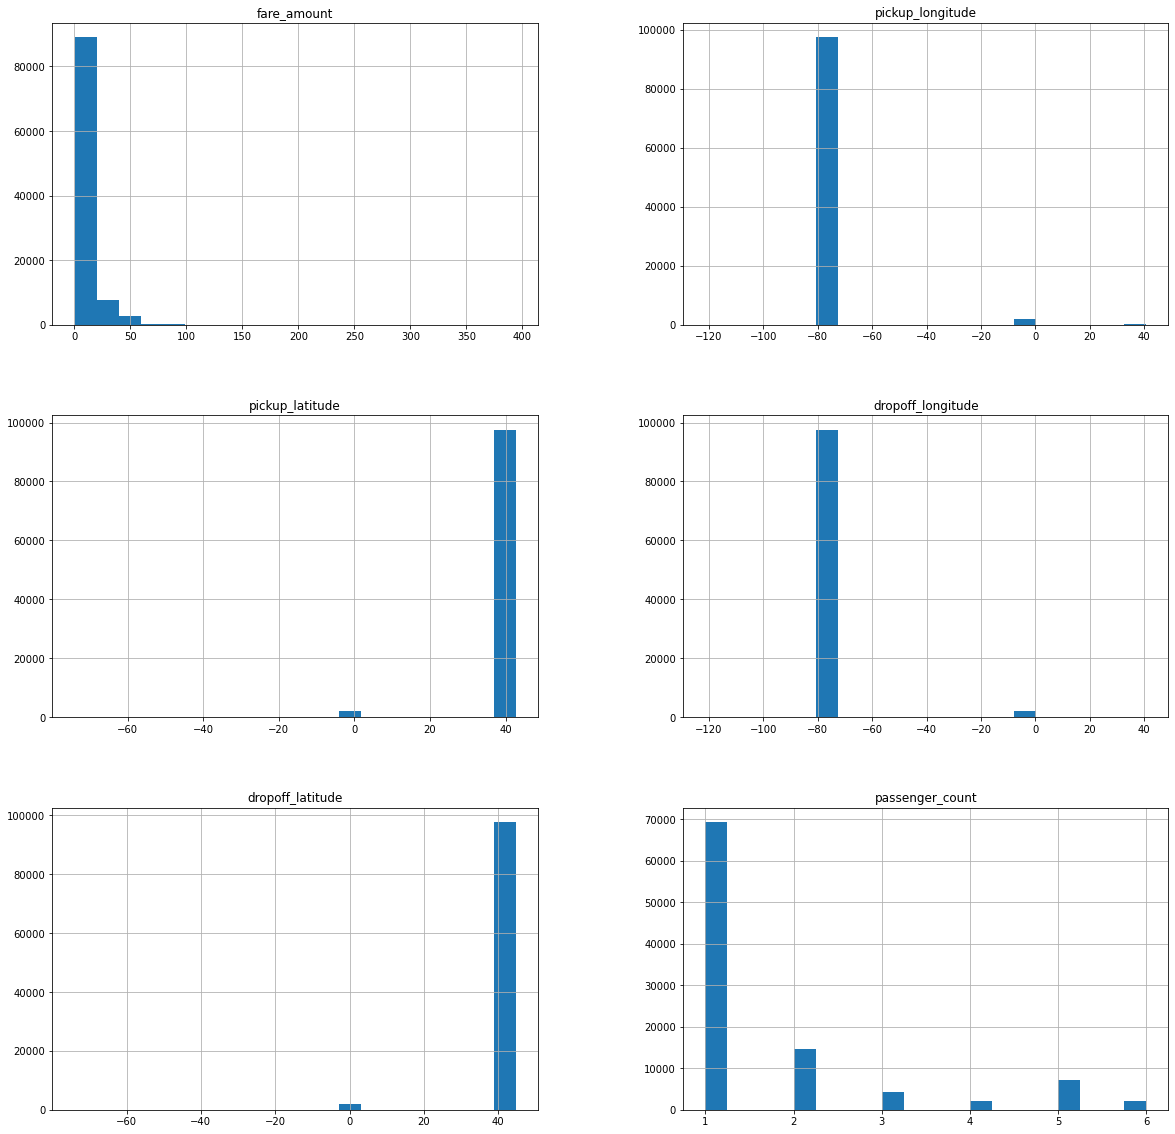

In [27]:
train.hist(bins=20, figsize=(20,20))
plt.show()

### Anomally detected !

As we can see above that the longitide and lattitude in some of the locations is zero. And if we go to (0,0) on globe (reference - https://gps-coordinates.org/latitude-and-longitude.php), we will land up in the ocean !

Funnily enough, our data is taxi fare data and we don't have underwater cars yet ! 

Also, another illogical thing is that the pickup coordinates should not be the same as dropoff coordinates. 

Its not a fake-taxi afterall !

So we will have to drop these rows

In [28]:
train.loc[
    (train['pickup_latitude'] == 0) & (train['dropoff_latitude'] == 0) | 
    (train['pickup_longitude'] == 0) & (train['dropoff_longitude'] == 0) |
    ((train['pickup_latitude'] == train['dropoff_latitude']) & (train['pickup_longitude'] == train['dropoff_longitude']))
].shape

(2859, 8)

In [29]:
train.drop(train.loc[
    (train['pickup_latitude'] == 0) & (train['dropoff_latitude'] == 0) | 
    (train['pickup_longitude'] == 0) & (train['dropoff_longitude'] == 0) |
    ((train['pickup_latitude'] == train['dropoff_latitude']) & (train['pickup_longitude'] == train['dropoff_longitude']))
].index , axis = 0, inplace = True)

In [30]:
train.shape

(96763, 8)

In [31]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96763 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                96763 non-null  datetime64[ns]     
 1   fare_amount        96763 non-null  float64            
 2   pickup_datetime    96763 non-null  datetime64[ns, UTC]
 3   pickup_longitude   96763 non-null  float64            
 4   pickup_latitude    96763 non-null  float64            
 5   dropoff_longitude  96763 non-null  float64            
 6   dropoff_latitude   96763 non-null  float64            
 7   passenger_count    96763 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1)
memory usage: 6.6 MB


In [33]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2
1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1
3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5


Now, certain factors may affect the fare such as -
Number of passengers, date and time of pickup, day of the week (weekends are usaully costlier in real life), distance travelled



Let's work with distance first  - 

To calculate distance, we shall use the Haversine formula 

(reference - https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula)

function getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2) {


  var R = 6371; // Radius of the earth in km


var dLat = deg2rad(lat2-lat1);  // deg2rad below


var dLon = deg2rad(lon2-lon1); 


var a = 


Math.sin(dLat/2) * Math.sin(dLat/2) +


Math.cos(deg2rad(lat1)) * Math.cos(deg2rad(lat2)) * 


Math.sin(dLon/2) * Math.sin(dLon/2)


; 


var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a)); 


var d = R * c; // Distance in km


return d;


}



function deg2rad(deg) {


return deg * (Math.PI/180)


}

In [34]:
def HAV_dist(data , lat1, long1 , lat2, long2):
    from math import cos, asin, sqrt, pi
    
    R,A1,A2 = 6371,np.radians(data[lat1]),np.radians(data[lat2])
    
    
    diff_A = np.radians(data[lat2] - data[lat1])
    diff_L = np.radians(data[long2] - data[long1])
    
    a = np.sin(diff_A/2.0)**2 + np.cos(A1)*np.cos(A2)*np.sin(diff_L/2.0)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R*c
    
    data['distance'] = d
    # The distance returned is in killometeres !
    return d

In [35]:
train['distance'] =  HAV_dist(train, 'pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude')
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,1.116850
1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,1.055053
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2.715959
3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,5.101370
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,4.800593


In [36]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000
mean,11.337445,-73.819269,40.640793,-73.835150,40.647809,1.687939,20.101361
std,9.662467,3.782414,3.076463,3.621570,3.033845,1.306025,373.096245
min,0.010000,-121.391202,-74.015935,-121.391318,-74.011085,1.000000,0.000084
25%,6.000000,-73.992348,40.736252,-73.991631,40.735484,1.000000,1.281120
50%,8.500000,-73.982132,40.753127,-73.980681,40.753782,1.000000,2.177946
75%,12.500000,-73.968452,40.767432,-73.965493,40.768362,2.000000,3.973685
max,394.000000,40.801777,42.364088,40.787037,44.640672,6.000000,8762.401420


In [37]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Day of week'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour

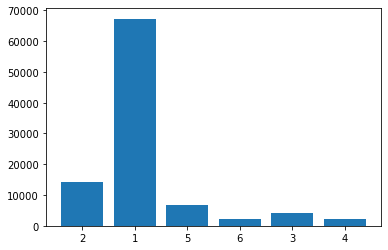

In [38]:
import plotly.express as px
from collections import Counter
data  = dict(Counter(train['passenger_count']))
names = list(data.keys())
values = list(data.values())
fig = plt.bar(range(len(data)), values, tick_label = names)

Text(0, 0.5, 'Fare')

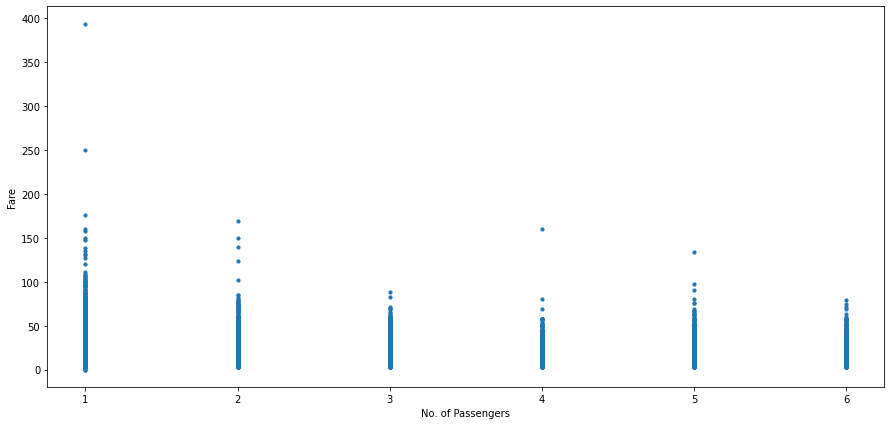

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

In [40]:
corr_matrix = train.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day of week,Hour
fare_amount,1.000000,0.012896,-0.008853,0.012726,-0.008208,0.016121,0.024252,0.115951,0.026165,0.006873,-0.018943
pickup_longitude,0.012896,1.000000,-0.927229,0.606530,-0.698430,0.009934,0.479602,0.017505,-0.010774,0.001446,0.004618
pickup_latitude,-0.008853,-0.927229,1.000000,-0.713923,0.842689,-0.012096,-0.291656,-0.018361,0.010935,-0.002273,-0.005578
dropoff_longitude,0.012726,0.606530,-0.713923,1.000000,-0.945286,0.012480,0.405590,0.025931,-0.007489,0.004016,0.002140
dropoff_latitude,-0.008208,-0.698430,0.842689,-0.945286,1.000000,-0.013393,-0.247089,-0.023642,0.008742,-0.003577,-0.004393
passenger_count,0.016121,0.009934,-0.012096,0.012480,-0.013393,1.000000,-0.001534,0.003449,0.003768,0.035660,0.024155
distance,0.024252,0.479602,-0.291656,0.405590,-0.247089,-0.001534,1.000000,0.024507,-0.004240,0.003030,-0.002683
Year,0.115951,0.017505,-0.018361,0.025931,-0.023642,0.003449,0.024507,1.000000,-0.116638,0.009388,0.002596
Month,0.026165,-0.010774,0.010935,-0.007489,0.008742,0.003768,-0.004240,-0.116638,1.000000,-0.005642,-0.006440
Day of week,0.006873,0.001446,-0.002273,0.004016,-0.003577,0.035660,0.003030,0.009388,-0.005642,1.000000,-0.085444


In [41]:
print(train.shape)
train = train.loc[
    (train['pickup_latitude'] > 30) & (train['pickup_latitude'] < 50) & 
    (train['dropoff_latitude'] > 30 ) & (train['dropoff_latitude'] < 50 ) &
    (train['pickup_longitude'] > -80) & (train['pickup_longitude'] < -60) &
    (train['dropoff_longitude'] > -80 ) & (train['dropoff_longitude'] < -60 ) 
]
train.shape

(96763, 13)


(96499, 13)

In [42]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day of week,Hour
count,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000,96499.000000
mean,11.329971,-73.975529,40.750835,-73.974742,40.751264,1.687437,3.393487,2011.741572,6.268241,3.029544,13.513684
std,9.634859,0.040508,0.030396,0.037941,0.037275,1.305341,4.457968,1.866287,3.435857,1.950619,6.513714
min,0.010000,-75.656882,38.708626,-75.677442,38.721912,1.000000,0.000084,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992363,40.736392,-73.991650,40.735613,1.000000,1.280231,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.982157,40.753202,-73.980710,40.753844,1.000000,2.173716,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.968580,40.767477,-73.965653,40.768388,2.000000,3.956861,2013.000000,9.000000,5.000000,19.000000
max,394.000000,-71.061530,42.364088,-71.076242,44.640672,6.000000,436.305506,2015.000000,12.000000,6.000000,23.000000


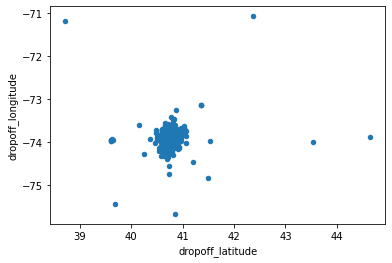

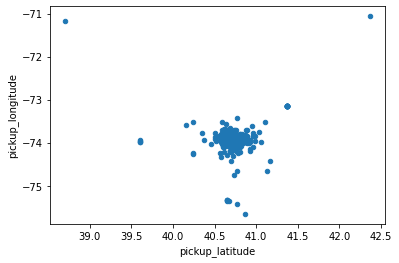

In [43]:
fig = train.plot.scatter(x='dropoff_latitude',y='dropoff_longitude')
fig1 = train.plot.scatter(x='pickup_latitude',y='pickup_longitude')

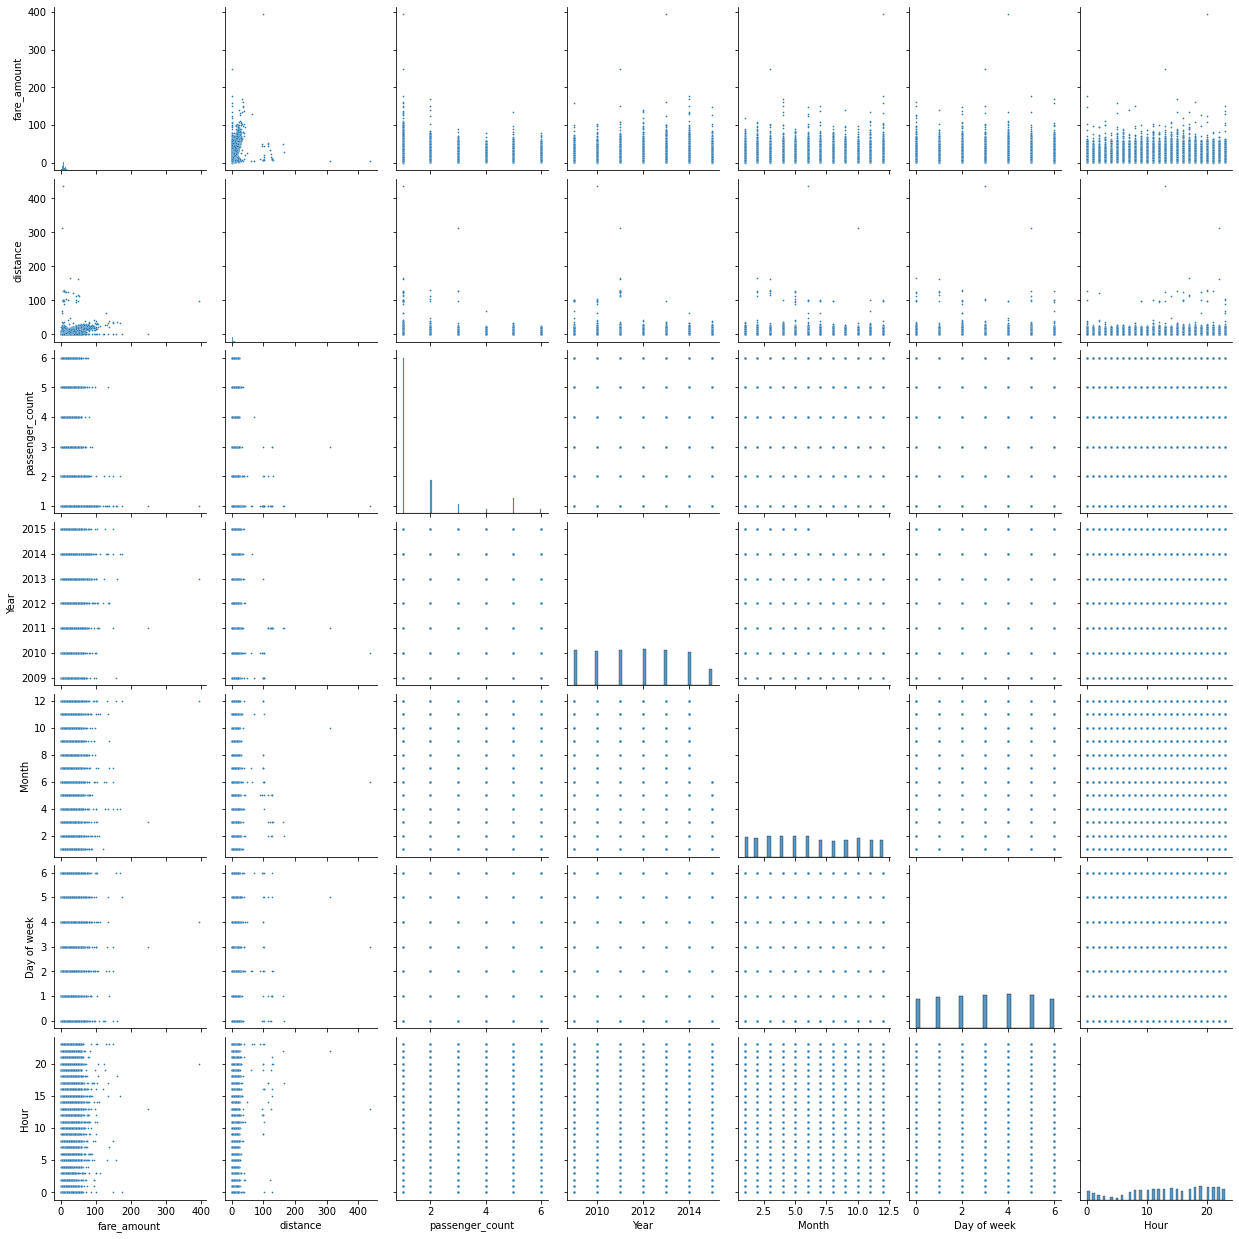

In [44]:
attributes = ['fare_amount' , 'distance', 'passenger_count', "Year","Month","Day of week","Hour"]
sns.pairplot(train[attributes], plot_kws={"s": 3})
plt.show()

As one can see that the fare amount is positively co-related to the distnance, year, month and day of week but is somehow negatievely co-related to the hour

The negative co-orelation may be because of the fact that drivers don't usually bargain at the start of the day but accept bargains at the end of the day after they have completed their target. 

One other unusal thing is that certain drivers are charging high money for low. The total co-orelation may be positive but in actuality, the fare increases with distance, then decreases and then decreases again. This must be because of the fact that the intercity rates are different from interstate rates. 

## Handling categorical data and Scaling

Hour, month, year etc may seem numerical but are actually categorical/ordinal data and so must be handed using one-hot encoding

In [45]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance', 'Year', 'Month', 'Day of week', 'Hour'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
y = train
y.drop(['pickup_datetime', 'pickup_longitude','key',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace = True, axis = 1)
sc = StandardScaler()
mms = MinMaxScaler()
x = y.drop(['Hour','Day of week','Month','Year'], axis = 1) 
train_scaled = mms.fit_transform(x)
y.columns

Index(['fare_amount', 'passenger_count', 'distance', 'Year', 'Month',
       'Day of week', 'Hour'],
      dtype='object')

In [47]:
dum = sc.fit_transform(y)


In [48]:
print(len(dum[0]), len(y.columns),'\n' , y.columns)
y["Year"].head()

7 7 
 Index(['fare_amount', 'passenger_count', 'distance', 'Year', 'Month',
       'Day of week', 'Hour'],
      dtype='object')


0    2009
1    2012
2    2011
3    2010
4    2009
Name: Year, dtype: int64

In [49]:
train_scaled

array([[0.01241148, 0.2       , 0.0025596 ],
       [0.01241148, 0.2       , 0.00241796],
       [0.01748775, 0.        , 0.00622471],
       ...,
       [0.03677758, 0.        , 0.00643643],
       [0.02281784, 0.        , 0.0047583 ],
       [0.03804665, 0.        , 0.00646602]])

In [50]:
final = train_scaled
for i in ['Hour','Year','Day of week','Month']: 
    ord_enc,one_hot = OrdinalEncoder(), OneHotEncoder(sparse = False)
    data = train[[i]]
#     print(data)
    ord_data = ord_enc.fit_transform(data)
#     print(ord_data[0])
    one_hot_data = one_hot.fit_transform(ord_data).tolist()
#     print(one_hot_data[0], type(one_hot_data))
#     print(len(one_hot_data[0]))
    final = np.concatenate((final,one_hot_data), axis = 1)
final

array([[0.01241148, 0.2       , 0.0025596 , ..., 0.        , 0.        ,
        0.        ],
       [0.01241148, 0.2       , 0.00241796, ..., 0.        , 0.        ,
        0.        ],
       [0.01748775, 0.        , 0.00622471, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03677758, 0.        , 0.00643643, ..., 0.        , 0.        ,
        0.        ],
       [0.02281784, 0.        , 0.0047583 , ..., 0.        , 0.        ,
        1.        ],
       [0.03804665, 0.        , 0.00646602, ..., 0.        , 0.        ,
        0.        ]])

# Making a pipeline

Lets make a pipeline so that we don't have to do all this on the test data


Reference used - Class tutorial sheet

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class Data_cleaner(BaseEstimator, TransformerMixin):
    # Taking which column to modify as "col" parameter
    def __init__(self, cols):
        self.cols = cols
        self.median = {}
    # Fit just calculated the median value and stores it as class variable
    def fit(self, X, y=None):
 
        
        for i in self.cols : self.median[i] = X[i].median()
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        print("Data Cleaning going on rn \n\n....................................")
        X.drop(X.loc[
        (X['pickup_latitude'] == 0) & (X['dropoff_latitude'] == 0) | 
        (X['pickup_longitude'] == 0) & (X['dropoff_longitude'] == 0) |
        ((X['pickup_latitude'] == X['dropoff_latitude']) & (X['pickup_longitude'] == X['dropoff_longitude']))
        ].index , axis = 0, inplace = True)
        
        X = X.loc[
        (X['pickup_latitude'] > 30) & (X['pickup_latitude'] < 50) & 
        (X['dropoff_latitude'] > 30 ) & (X['dropoff_latitude'] < 50 ) &
        (X['pickup_longitude'] > -80) & (X['pickup_longitude'] < -60) &
        (X['dropoff_longitude'] > -80 ) & (X['dropoff_longitude'] < -60 ) ]
        
        X = X.drop(X.loc[X['fare_amount'] <= 0].index, axis = 0)
        X = X.drop(X.loc[X['passenger_count'] <= 0].index, axis = 0)
        
        X = X.fillna(self.median)
    
        return X


In [52]:
class add_features(BaseEstimator,TransformerMixin):
    def __init__(self,distance=True, hour=True, month=True, year=True, day_of_week = True ):
        self.distance = True
        self.hour = True
        self.month = True 
        self.year = True
        self.day_of_week = True
    
    def fit(self, X, y = None) : 
        return self
    #No use here since we only wanna tranform
    
    def transform(self,X):
        def HAV_dist(data , lat1, long1 , lat2, long2):
            from math import cos, asin, sqrt, pi
    
            R,A1,A2 = 6371,np.radians(data[lat1]),np.radians(data[lat2])
    
    
            diff_A = np.radians(data[lat2] - data[lat1])
            diff_L = np.radians(data[long2] - data[long1])
    
            a = np.sin(diff_A/2.0)**2 + np.cos(A1)*np.cos(A2)*np.sin(diff_L/2.0)**2
            c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
            d = R*c
    
            data['distance'] = d
            # The distance returned is in killometeres !
            return d
    
        print("___________________________________________________________________")
        print("Adding new features \n\n....................................")
        if self.distance :
            X['distance'] = HAV_dist(X, 'pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude')
        
        
        if self.hour & self.month & self.year & self.day_of_week : 
            X['key'] = pd.to_datetime(X['key'])
            X['pickup_datetime']  = pd.to_datetime(X['pickup_datetime'])
            X['Year'] = X['pickup_datetime'].dt.year
            X['Month'] = X['pickup_datetime'].dt.month
            X['Day of week'] = X['pickup_datetime'].dt.dayofweek
            X['Hour'] = X['pickup_datetime'].dt.hour
            
        X.drop(['pickup_datetime', 'pickup_longitude','key','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace = True, axis = 1)
        
        return X 
    

In [53]:
class One_hot_and_scale(BaseEstimator,TransformerMixin) :
    def __init__(self, num = ['fare_amount', 'passenger_count', 'distance'], ordinal = ['Year', 'Month','Day of week', 'Hour']) :
        self.num = num
        self.ordinal = ordinal
        from sklearn.preprocessing import OrdinalEncoder
        from sklearn.preprocessing import OneHotEncoder
        from sklearn.preprocessing import MinMaxScaler
    def fit(self, X, y = None):
        return self

    def transform(self , X):
        
        print("___________________________________________________________________")
        print("Scaling \n\n....................................")
        
        self.encoder = OneHotEncoder(sparse = False)
        self.cat = OrdinalEncoder()
        dummy1 = X[['fare_amount', 'passenger_count', 'distance']]
        final = dummy1
        sc = StandardScaler()
        mms = MinMaxScaler()
        dummy2 = X[['Hour','Year','Day of week','Month']]
        train_scaled = mms.fit_transform(dummy1)
        final = train_scaled
        print("___________________________________________________________________")
        print("Encoding... \n\n....................................")
        for i in dummy2.columns.tolist(): 
            ord_enc,one_hot = OrdinalEncoder(), OneHotEncoder(sparse = False)
            data = dummy2[[i]]
            ord_data = ord_enc.fit_transform(data)
            one_hot_data = self.encoder.fit_transform(ord_data).tolist()
            final = np.concatenate((final,one_hot_data), axis = 1)
        
        
        print("\n\nDone")
        return final

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
train = pd.read_csv('data/train_NYTaxi.csv').drop(columns = ['Index'])
pre_pipe = Pipeline([
    ('clean data', Data_cleaner(cols=['fare_amount', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count'])),
    ('Add features', add_features()),
    ('Scaling and Onehot encoding', One_hot_and_scale())
])
train_prepared = pre_pipe.fit_transform(train)
train_prepared

Data Cleaning going on rn 

....................................
___________________________________________________________________
Adding new features 

....................................
___________________________________________________________________
Scaling 

....................................
___________________________________________________________________
Encoding... 

....................................


Done


array([[0.01241148, 0.2       , 0.0025596 , ..., 0.        , 0.        ,
        0.        ],
       [0.01241148, 0.2       , 0.00241796, ..., 0.        , 0.        ,
        0.        ],
       [0.01748775, 0.        , 0.00622471, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03677758, 0.        , 0.00643643, ..., 0.        , 0.        ,
        0.        ],
       [0.02281784, 0.        , 0.0047583 , ..., 0.        , 0.        ,
        1.        ],
       [0.03804665, 0.        , 0.00646602, ..., 0.        , 0.        ,
        0.        ]])

# Use of Validation Set and Cross Validation Approach


In [55]:
y  = np.array_split(train_prepared, 10)
print(len(y[0]))

9650


Now, the above function is in-built so we will make our own hash functions to split data

Reference - https://www.geeksforgeeks.org/hash-functions-and-list-types-of-hash-functions/ (Implemented (1) and (4))

In [56]:
def mod_hash(a, key = 10, shuffle = False):
    
    if shuffle :np.random.shuffle(a)
    buckets = [[] for i in range(key)]
    
    for i in range(len(a)):
        x = i%key
        
        buckets[x].append(a[i])
        
    return buckets

def Mul_hash(a, m = 10, A = 0.1234566, shuffle = False):
    # m is the number of splits we need
    if shuffle : np.random.shuffle(a)
    
    buckets = [[] for i in range(m)]
    import math
    for i in range(len(a)): 
        
        x = math.floor(m*((A*i)%1))
        
        buckets[x].append(a[i])
        
    return buckets

In [57]:
splitted_training_data = Mul_hash(train_prepared, shuffle = True, m = 15)
for i in splitted_training_data : print(len(i))

6276
6509
6436
6349
6597
6278
6506
6438
6346
6597
6279
6505
6439
6344
6600


In [58]:
import random
ind = random.choice(range(0,10))
print(ind, end = ' ')
validation_final = np.array(splitted_training_data[ind])
train_final_array = splitted_training_data[:ind] + splitted_training_data[ind+1:]

3 

In [59]:
train_final = train_final_array[0]
print(len(train_final_array))
for i in range(1,len(train_final_array)):
    print(i, end = ' ')
    train_final = np.concatenate((train_final, train_final_array[i]), axis = 0)    

14
1 2 3 4 5 6 7 8 9 10 11 12 13 

In [60]:
print(train_final.shape[0], '\n',validation_final.shape[0])

90150 
 6349


In [61]:
train_final

array([[0.04819919, 0.        , 0.01042712, ..., 0.        , 0.        ,
        0.        ],
       [0.01139623, 0.        , 0.00171825, ..., 0.        , 0.        ,
        0.        ],
       [0.0164725 , 1.        , 0.0043196 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02560979, 0.2       , 0.00641674, ..., 0.        , 0.        ,
        1.        ],
       [0.01342674, 0.        , 0.00684598, ..., 1.        , 0.        ,
        0.        ],
       [0.01241148, 0.2       , 0.0021576 , ..., 1.        , 0.        ,
        0.        ]])

In [62]:
y_train = train_final[:,0]
x_train = np.delete(train_final, 0, axis = 1)
y_val = validation_final[:,0]
x_val = np.delete(validation_final, 0, axis = 1)
Mean_loss = {'Matrix' : 0, 
             'GD'     : 0,
             'KNN'    : 0
            }

# Using Matrix Method

w_opt = Pseudoinv(A)*y

In [63]:
A = np.c_[np.ones((x_train.shape[0],1)), x_train]
w_mat =  np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
w_mat

array([-0.69573922, -0.02527115,  0.67852356,  0.02983706,  0.03365955,
        0.21157726, -0.32873365, -0.07025574,  0.05822674,  0.10575074,
       -0.06127778, -0.38098339, -0.06820399, -0.16871523, -0.39195246,
       -0.04281517, -0.22434507, -0.25532223, -0.31725624, -0.04962327,
        0.25973842, -0.17407786,  0.01027933,  0.2684835 , -0.09385716,
       -0.23134934, -0.12683642,  0.18089181,  0.16864972,  0.17181902,
        0.17766091,  0.22924965,  0.21270522,  0.25099713,  0.23227518,
        0.15510419,  0.31836969,  0.27028864,  0.26472437,  0.38110012,
        0.40685885,  0.22507349,  0.34039298,  0.1943825 ,  0.17396845,
        0.20711231,  0.16491223,  0.25442575,  0.185665  ,  0.13342593,
        0.23084852,  0.18414178,  0.16131182])

In [64]:
x_val_modif = np.c_[np.ones((x_val.shape[0],1)), x_val]
y_pred_mat = x_val_modif@w_mat
y_pred_mat

array([-0.39009762, -0.15734282, -0.24532755, ...,  0.18983308,
       -0.14188633, -0.0114623 ])

In [65]:
Mean_loss["Matrix"] = np.power(np.power(y_pred_mat - y_val, 2), 0.5).sum()/y_pred_mat.shape[0]

# Using Opt. based (Gradient Descent)
![Grad](https://miro.medium.com/max/255/0*PvjYsW-ivVuxt66h)
![Grad-1](https://miro.medium.com/max/321/0*Co4CiFtojSRjFbj3)
![Grad-2](https://miro.medium.com/max/311/0*U_q_T4zVMYmp8Kqf)
![Grad-3](https://miro.medium.com/max/392/0*p3ag4tX1lyHJCE9s)
![Grad-4](https://miro.medium.com/max/347/0*v4Wzqi_BwLTi8Qf2)

In [66]:
class Linear_Regressor_GD:
    
    def __init__(self, lr = 10, n_iters = 10000, tolerance = 0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.tolerance = tolerance
        self.loss = 0
    def _init_parameters(self):
        self.weights = np.random.rand(self.n_features)
        self.bias = 0
        self.i = 1
        
    def _update_parameters(self, dw, db):
        self.lr = self.lr/i
        self.weights = self.weights - self.lr*dw
        self.bias = self.bias - self.lr*db
        self.i = self.i + 1
#         print(self.weights)
#         print(self.bias)
    def _get_prediction(self, X):
        return np.dot(X,self.weights) + self.bias
    
    def _get_gradients(self, X, y, y_pred):
        dw = np.dot(X.T,self.err)/self.n_samples
        db = np.sum(self.err) /self.n_samples
        
        return dw, db
    
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        
        self._init_parameters()
        
        for i in range(self.n_iters):
            y_pred = self._get_prediction(X)
            self.err = y_pred - y
            self.loss = np.power(self.err.sum(),2)/X.shape[0]
            if (self.loss <= self.tolerance) : 
                break
#             print(y_pred)
            dw, db = self._get_gradients(X, y,y_pred)
#             print(dw)
            self._update_parameters(dw, db)
            
            
            
    def predict(self, X):
        
        y_pred = self._get_prediction(X)
        
        return y_pred

In [67]:
LR_GD = Linear_Regressor_GD()
LR_GD.fit(x_train, y_train)
y_pred_GD = LR_GD.predict(x_val)
Mean_loss["GD"] = np.power((np.power((y_pred_GD - y_val), 2)).sum(), 0.5)/y_pred_GD.shape[0]

# Non Parametirc approach (KNN)

In [68]:

from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)

clf.fit(x_train,y_train)

y_pred_knn = clf.predict(x_val)
Mean_loss["KNN"] = np.power((np.power((y_pred_knn - y_val), 2)).sum(), 0.5)/y_pred_knn.shape[0]

In [69]:
print(Mean_loss)

{'Matrix': 0.20555950460932618, 'GD': 0.006287898762127095, 'KNN': 0.0002796419525489059}


# Lets combine using cross validation !

In [70]:
for index in range(0,len(splitted_training_data)) :
    validation_final = np.array(splitted_training_data[index])
    train_final_array = splitted_training_data[:index] + splitted_training_data[index+1:]
    train_final = train_final_array[0]
#     print(len(train_final_array))
    for i in range(1,len(train_final_array)):
#         print(i, end = ' ')
        train_final = np.concatenate((train_final, train_final_array[i]), axis = 0)   
    y_train = train_final[:,0]
    x_train = np.delete(train_final, 0, axis = 1)
    y_val = validation_final[:,0]
    x_val = np.delete(validation_final, 0, axis = 1)
    Mean_loss = {'Matrix' : 0, 
                 'GD'     : 0,
                 'KNN'    : 0
                }
    
    try : 
        A = np.c_[np.ones((x_train.shape[0],1)), x_train]
        w_mat =  np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
        x_val_modif = np.c_[np.ones((x_val.shape[0],1)), x_val]
        y_pred_mat = x_val_modif@w_mat
        Mean_loss["Matrix"] = np.power(np.power(y_pred_mat - y_val, 2), 0.5).sum()/y_pred_mat.shape[0]
    except : 
        print('Non singular matrix')
        
    LR_GD = Linear_Regressor_GD()
    LR_GD.fit(x_train, y_train)
    y_pred_GD = LR_GD.predict(x_val)
    Mean_loss["GD"] = np.power((np.power((y_pred_GD - y_val), 2)).sum(), 0.5)/y_pred_GD.shape[0]
    clf = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)

    clf.fit(x_train,y_train)

    y_pred_knn = clf.predict(x_val)
    Mean_loss["KNN"] = np.power((np.power((y_pred_knn - y_val), 2)).sum(), 0.5)/y_pred_knn.shape[0]
    
    print('The loss for index {} is'.format(index), end = ' ')
    print(Mean_loss)

The loss for index 0 is {'Matrix': 0.1484752679212688, 'GD': 0.007014885181885739, 'KNN': 0.0002892270794391954}
The loss for index 1 is {'Matrix': 2.547364301531171, 'GD': 0.006259403364701433, 'KNN': 0.0002916147674047577}
The loss for index 2 is {'Matrix': 1.3222379354199263, 'GD': 0.006238310523849132, 'KNN': 0.00028434389217071946}
The loss for index 3 is {'Matrix': 0.20555950460932618, 'GD': 0.007248141963542297, 'KNN': 0.0002796419525489059}
The loss for index 4 is {'Matrix': 0.2750510283413527, 'GD': 0.00659661370970911, 'KNN': 0.00031343566051225875}
The loss for index 5 is {'Matrix': 0.21106407922894738, 'GD': 0.006872592238494238, 'KNN': 0.000295296136096988}
The loss for index 6 is {'Matrix': 1.3519102247763641, 'GD': 0.0071094821060341575, 'KNN': 0.0002765143181566465}
The loss for index 7 is {'Matrix': 4.589619352089325, 'GD': 0.0059323449467538055, 'KNN': 0.00029233104872573775}
The loss for index 8 is {'Matrix': 0.13871775998651248, 'GD': 0.0073224600900561486, 'KNN': 0

Out of all the models, the KNN model performed the best and in least time !
Grad descend might not be working too well because of the lack of optimizations but it still gives acceptable results !


But the results are still not that good. Lets give a try after adding some noise into our y_test so that we can prevent overfitting !

In [71]:
y_noise = (0.0005)*np.random.normal(0,1,len(y_train))
y_noisy_train = y_train + y_noise
y_train

array([0.04819919, 0.01139623, 0.0164725 , ..., 0.04693013, 0.0164725 ,
       0.01342674])

In [72]:
y_noisy_train

array([0.04907953, 0.01117078, 0.01585178, ..., 0.04710747, 0.01610083,
       0.0143297 ])

In [73]:
for index in range(0,len(splitted_training_data)) :
    validation_final = np.array(splitted_training_data[index])
    train_final_array = splitted_training_data[:index] + splitted_training_data[index+1:]
    train_final = train_final_array[0]
#     print(len(train_final_array))
    for i in range(1,len(train_final_array)):
#         print(i, end = ' ')
        train_final = np.concatenate((train_final, train_final_array[i]), axis = 0)   
    y_train = train_final[:,0] + 0.001*np.random.normal(0,1,len(train_final))
    x_train = np.delete(train_final, 0, axis = 1)
    y_val = validation_final[:,0]
    x_val = np.delete(validation_final, 0, axis = 1)
    Mean_loss = {'Matrix' : 0, 
                 'GD'     : 0,
                 'KNN'    : 0
                }
    
    try : 
        A = np.c_[np.ones((x_train.shape[0],1)), x_train]
        w_mat =  np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
        x_val_modif = np.c_[np.ones((x_val.shape[0],1)), x_val]
        y_pred_mat = x_val_modif@w_mat
        Mean_loss["Matrix"] = np.power(np.power(y_pred_mat - y_val, 2), 0.5).sum()/y_pred_mat.shape[0]
    except : 
        print('Non singular matrix')
        
    LR_GD = Linear_Regressor_GD()
    LR_GD.fit(x_train, y_train)
    y_pred_GD = LR_GD.predict(x_val)
    Mean_loss["GD"] = np.power((np.power((y_pred_GD - y_val), 2)).sum(), 0.5)/y_pred_GD.shape[0]
    clf = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)

    clf.fit(x_train,y_train)

    y_pred_knn = clf.predict(x_val)
    Mean_loss["KNN"] = np.power((np.power((y_pred_knn - y_val), 2)).sum(), 0.5)/y_pred_knn.shape[0]
    
    print('The loss for index {} is'.format(index), end = ' ')
    print(Mean_loss)

The loss for index 0 is {'Matrix': 0.14847556673731627, 'GD': 0.006515202160721997, 'KNN': 0.0002893587695707378}
The loss for index 1 is {'Matrix': 2.308949734495051, 'GD': 0.007020649557662051, 'KNN': 0.00029155254453706647}
The loss for index 2 is {'Matrix': 1.3218597062381414, 'GD': 0.006360858377430953, 'KNN': 0.00028432911480347217}
The loss for index 3 is {'Matrix': 0.20554979277147536, 'GD': 0.0065195273871373255, 'KNN': 0.0002796683615919368}
The loss for index 4 is {'Matrix': 0.27507062311822555, 'GD': 0.006480366680462158, 'KNN': 0.000313503873416573}
The loss for index 5 is {'Matrix': 0.2110312670168327, 'GD': 0.006890691352452348, 'KNN': 0.0002953601104878431}
The loss for index 6 is {'Matrix': 1.3520129601722786, 'GD': 0.006942573571418289, 'KNN': 0.0002765234061579603}
The loss for index 7 is {'Matrix': 3.276185730400727, 'GD': 0.0066495319184353896, 'KNN': 0.0002924378402923786}
The loss for index 8 is {'Matrix': 0.1387011378208487, 'GD': 0.007709996740203333, 'KNN': 0.

TOO much noise may lead to bad results ?

May or may not

Lets try with 10 X noise (IT should increase loss since its too much !)

In [74]:
for index in range(0,len(splitted_training_data)) :
    validation_final = np.array(splitted_training_data[index])
    train_final_array = splitted_training_data[:index] + splitted_training_data[index+1:]
    train_final = train_final_array[0]
#     print(len(train_final_array))
    for i in range(1,len(train_final_array)):
#         print(i, end = ' ')
        train_final = np.concatenate((train_final, train_final_array[i]), axis = 0)   
    y_train = train_final[:,0] + 0.01*np.random.normal(0,1,len(train_final)) # 10X more noise !
    x_train = np.delete(train_final, 0, axis = 1)
    y_val = validation_final[:,0]
    x_val = np.delete(validation_final, 0, axis = 1)
    Mean_loss = {'Matrix' : 0, 
                 'GD'     : 0,
                 'KNN'    : 0
                }
    
    try : 
        A = np.c_[np.ones((x_train.shape[0],1)), x_train]
        w_mat =  np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
        x_val_modif = np.c_[np.ones((x_val.shape[0],1)), x_val]
        y_pred_mat = x_val_modif@w_mat
        Mean_loss["Matrix"] = np.power(np.power(y_pred_mat - y_val, 2), 0.5).sum()/y_pred_mat.shape[0]
    except : 
        print('Non singular matrix')
        
    LR_GD = Linear_Regressor_GD()
    LR_GD.fit(x_train, y_train)
    y_pred_GD = LR_GD.predict(x_val)
    Mean_loss["GD"] = np.power((np.power((y_pred_GD - y_val), 2)).sum(), 0.5)/y_pred_GD.shape[0]
    clf = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)

    clf.fit(x_train,y_train)

    y_pred_knn = clf.predict(x_val)
    Mean_loss["KNN"] = np.power((np.power((y_pred_knn - y_val), 2)).sum(), 0.5)/y_pred_knn.shape[0]
    
    print('The loss for index {} is'.format(index), end = ' ')
    print(Mean_loss)

The loss for index 0 is {'Matrix': 0.1489156328943675, 'GD': 0.006698526004595175, 'KNN': 0.00029542601964135105}
The loss for index 1 is {'Matrix': 2.462005314501839, 'GD': 0.006974755484083081, 'KNN': 0.0002966475930613784}
The loss for index 2 is {'Matrix': 1.3225494821257213, 'GD': 0.007196213215632995, 'KNN': 0.00029103437126046163}
The loss for index 3 is {'Matrix': 0.20585260932795188, 'GD': 0.006669250145525543, 'KNN': 0.0002845731479561346}
The loss for index 4 is {'Matrix': 0.274947360996967, 'GD': 0.007403653699105449, 'KNN': 0.00031800445063558173}
The loss for index 5 is {'Matrix': 0.21068578542033214, 'GD': 0.007394277817570365, 'KNN': 0.00030049497555848745}
The loss for index 6 is {'Matrix': 1.3486634126624673, 'GD': 0.006194114571160253, 'KNN': 0.0002819285594155966}
The loss for index 7 is {'Matrix': 7.357475939543691, 'GD': 0.006057744667950156, 'KNN': 0.00029748240461522995}
The loss for index 8 is {'Matrix': 0.13825525219488222, 'GD': 0.007027433495549861, 'KNN': 0

In [75]:
for index in range(0,len(splitted_training_data)) :
    validation_final = np.array(splitted_training_data[index])
    train_final_array = splitted_training_data[:index] + splitted_training_data[index+1:]
    train_final = train_final_array[0]
#     print(len(train_final_array))
    for i in range(1,len(train_final_array)):
#         print(i, end = ' ')
        train_final = np.concatenate((train_final, train_final_array[i]), axis = 0)   
    y_train = train_final[:,0] + 0.1*np.random.normal(0,1,len(train_final))
    x_train = np.delete(train_final, 0, axis = 1)
    y_val = validation_final[:,0]
    x_val = np.delete(validation_final, 0, axis = 1)
    Mean_loss = {'Matrix' : 0, 
                 'GD'     : 0,
                 'KNN'    : 0
                }
    
    try : 
        A = np.c_[np.ones((x_train.shape[0],1)), x_train]
        w_mat =  np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
        x_val_modif = np.c_[np.ones((x_val.shape[0],1)), x_val]
        y_pred_mat = x_val_modif@w_mat
        Mean_loss["Matrix"] = np.power(np.power(y_pred_mat - y_val, 2), 0.5).sum()/y_pred_mat.shape[0]
    except : 
        print('Non singular matrix')
        
    LR_GD = Linear_Regressor_GD()
    LR_GD.fit(x_train, y_train)
    y_pred_GD = LR_GD.predict(x_val)
    Mean_loss["GD"] = np.power((np.power((y_pred_GD - y_val), 2)).sum(), 0.5)/y_pred_GD.shape[0]
    clf = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)

    clf.fit(x_train,y_train)

    y_pred_knn = clf.predict(x_val)
    Mean_loss["KNN"] = np.power((np.power((y_pred_knn - y_val), 2)).sum(), 0.5)/y_pred_knn.shape[0]
    
    print('The loss for index {} is'.format(index), end = ' ')
    print(Mean_loss)

The loss for index 0 is {'Matrix': 0.14572170833521064, 'GD': 0.0069058497752771866, 'KNN': 0.0006309001624399742}
The loss for index 1 is {'Matrix': 2.22946082788236, 'GD': 0.006856835385896381, 'KNN': 0.0006208261478132866}
The loss for index 2 is {'Matrix': 1.319013227740677, 'GD': 0.006847686809300846, 'KNN': 0.0006198656070249202}
The loss for index 3 is {'Matrix': 0.20739947754208116, 'GD': 0.007264929791306765, 'KNN': 0.0006224847216804322}
The loss for index 4 is {'Matrix': 0.26981313606578294, 'GD': 0.0073493366150779805, 'KNN': 0.0006251056650420739}
The loss for index 5 is {'Matrix': 0.21159529059603716, 'GD': 0.006049371540878717, 'KNN': 0.0006264362222534707}
The loss for index 6 is {'Matrix': 1.3246186318340787, 'GD': 0.007038536882102202, 'KNN': 0.0006184535543647252}
The loss for index 7 is {'Matrix': 3.555145179473916, 'GD': 0.006647424550695528, 'KNN': 0.0006327770523889104}
The loss for index 8 is {'Matrix': 0.13716687004169809, 'GD': 0.0064738018354341745, 'KNN': 0.

### Notable observation - 

The Matrix model gets better with noise while and KNN react negatievely to it...Grad descent shows slightly negative behaviour!

Since the data is syntheic and clean, it had to happen. 
But in real world, we have noise data and in those cases, its not best to use KNN since it will take too much time and would not be able to predict properly unless we do rigourous cleaning using some decision based model first which makes it too complex...thus for noisy data, grad descent and matrix method are good. For higher dimentional data, KNN is not recommended at all. 